In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_theme()

,Channel,Frequency
0,0,0.100000
1,1,0.125000
2,2,0.166667
3,3,0.200000
4,4,0.250000
5,5,0.333333


Spreading Code :
[2. 5. 4. 2. 0. 4. 2. 1. 1. 3. 3. 4. 3. 0. 3. 5. 0. 5. 0. 5.]


Text(0.5, 131.24999999999997, 'Time(s)')

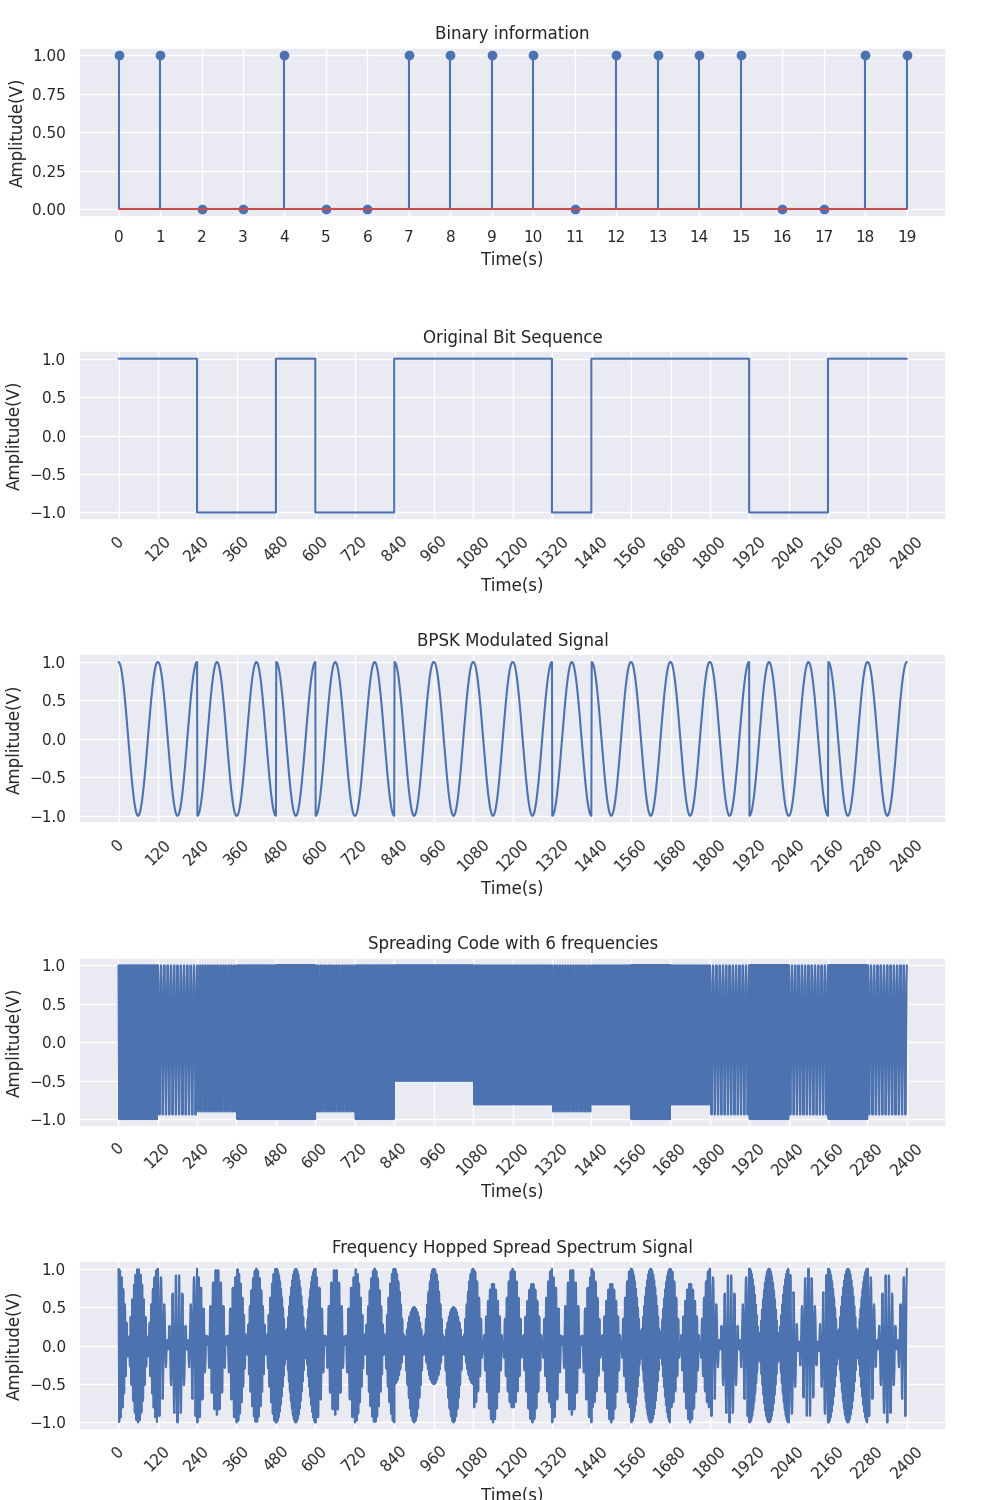

In [2]:
# Frequency Hopping Spread Spectrum (FHSS) Model
# http://dsp.vscht.cz/konference_matlab/MATLAB12/full_paper/059_Olsovsky.pdf

# Representation of Bandpass Signals
# http://www.eecs.umich.edu/courses/eecs555/appendixC.pdf

import numpy as np
import matplotlib.pyplot as plt

N = 20
# Generating N bits
s = np.random.randint(0, 2, N)
signal = []
carrier = []
T = 120
# Creating T samples for one cosine
t = np.linspace(0, 2 * np.pi, T)

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))
fig.tight_layout(pad=2.5, h_pad=6, w_pad=6)
ax[0].stem(s)
ax[0].set_xticks(np.arange(0, N, 1), np.arange(0, N, 1))
ax[0].set_title('Binary information')
ax[0].set_ylabel('Amplitude(V)')
ax[0].set_xlabel('Time(s)')

# Generation of bit pattern/bit stream(Polar NRZ type)
for k in range(N):
    if s[k] == 0:
        sig = -np.ones(T)  # T no.of MINUS ONES for bit 0
    else:
        sig = np.ones(T)  # T no.of ONES for bit 1
    c = np.cos(t)
    carrier = np.append(carrier, c)
    signal = np.append(signal, sig)


ax[1].step(np.arange(0, N * T, 1), signal)
ax[1].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[1].set_title('Original Bit Sequence')
ax[1].set_ylabel('Amplitude(V)')
ax[1].set_xlabel('Time(s)')

# BPSK Modulation of the signal
# Modulating the signal
bpsk_sig = signal * carrier

ax[2].plot(bpsk_sig)
ax[2].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[2].set_title('BPSK Modulated Signal')
ax[2].set_ylabel('Amplitude(V)')
ax[2].set_xlabel('Time(s)')

# Get factors of T. It is to have an integer multiple of wavelengths in each interval
factors = []
for i in range(1, T + 1):
    if T % i == 0:
        factors.append(i)
    
factors = factors[2:-8] # factors = [9, 10, 18, 36, 90, 180] # e.g. selected factors of T

# Create empty lists to store the time and cosine values for each channel
ts = []
cs = []

# Use a loop to compute the time and cosine values for each channel
# Every T samples, the carrier frequency is changed
for k in factors:
    t = np.linspace(0, 2 * np.pi, k) # step size is 2*pi/k
    c = np.cos(t)
    # Tiling is done to keep the constant number of samples in each channel
    c = np.tile(c, int(T / k))
    ts.append(t)
    cs.append(c)

# Random frequency hops to form a spread signal
spread_signal = np.array([])
spread = np.array([])
for n in range(N):
    c = np.random.randint(0, len(factors))
    spread = np.append(spread, c)
    spread_signal = np.append(spread_signal, cs[c])

freqs = [(i,1/k) for (i,k) in enumerate(reversed(factors))]

# display table with spreading_code and frequency
import pandas as pd
df = pd.DataFrame(freqs, columns=['Channel', 'Frequency'])
display(df)

print('Spreading Code :')
print(spread)
ax[3].plot(np.arange(1, N * T + 1), spread_signal)
ax[3].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)

ax[3].set_title(f"Spreading Code with {len(factors)} frequencies")
ax[3].set_ylabel('Amplitude(V)')
ax[3].set_xlabel('Time(s)')

# Spreading BPSK Signal into wider band with total of 12 frequencies
freq_hopped_sig = bpsk_sig * spread_signal
ax[4].plot(np.arange(1, N * T + 1), freq_hopped_sig)
ax[4].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[4].set_title('Frequency Hopped Spread Spectrum Signal')
ax[4].set_ylabel('Amplitude(V)')
ax[4].set_xlabel('Time(s)')

Text(0.5, 76.24999999999999, 'Time(s)')

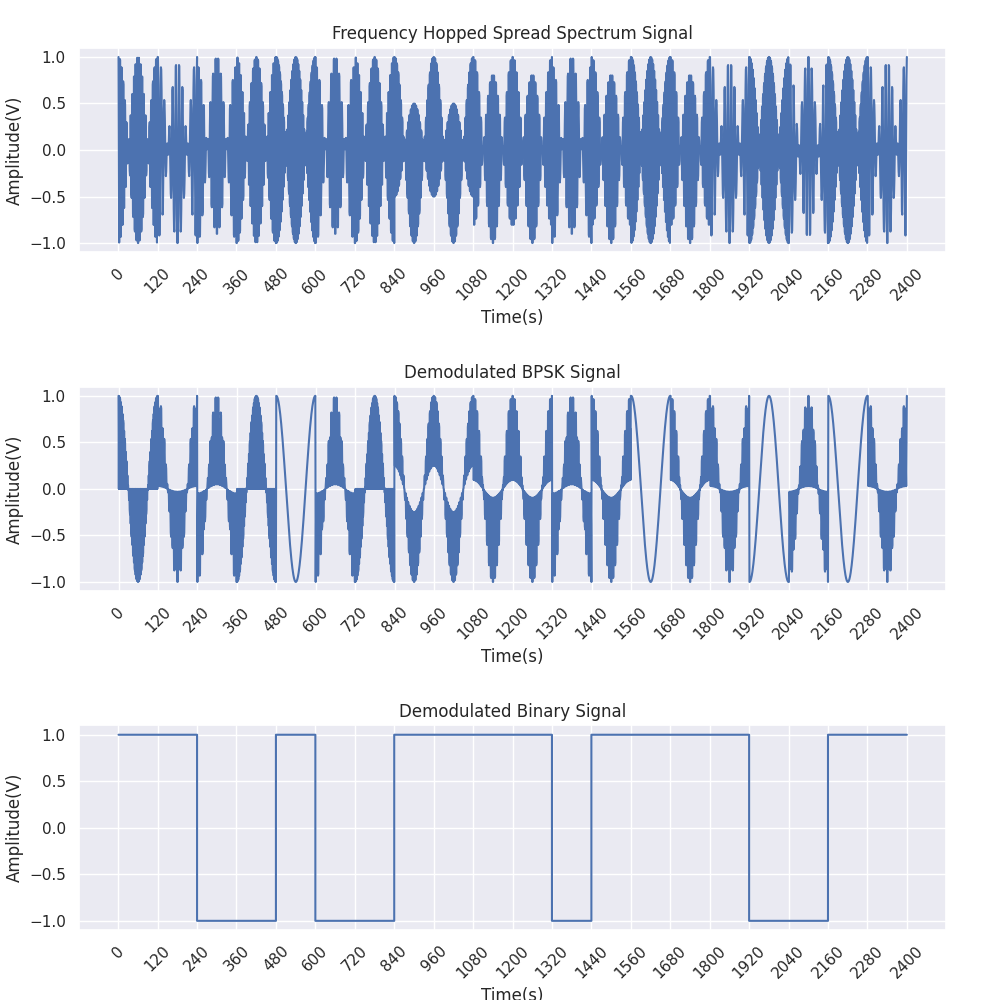

In [3]:
# Receiver Side

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.tight_layout(pad=2.5, h_pad=6, w_pad=6)

ax[0].plot(np.arange(1, N * T + 1), freq_hopped_sig)
ax[0].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[0].set_title('Frequency Hopped Spread Spectrum Signal')
ax[0].set_ylabel('Amplitude(V)')
ax[0].set_xlabel('Time(s)')

# Demodulated BPSK Signal
demod_psk = freq_hopped_sig * spread_signal
ax[1].plot(demod_psk)
ax[1].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[1].set_title('Demodulated BPSK Signal')
ax[1].set_ylabel('Amplitude(V)')
ax[1].set_xlabel('Time(s)')

demod_sig = np.array([])
for j in range(0, N * T, T):
    if demod_psk[j] < 0:
        sig = -np.ones(T)
    else:
        sig = np.ones(T)
    demod_sig = np.append(demod_sig, sig)

ax[2].step(np.arange(1, N * T + 1), demod_sig)
ax[2].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[2].set_title('Demodulated Binary Signal')
ax[2].set_ylabel('Amplitude(V)')
ax[2].set_xlabel('Time(s)')


Spreading Code :
[2. 5. 4. 2. 0. 4. 2. 1. 1. 3. 3. 4. 3. 0. 3. 5. 0. 5. 0. 5.]


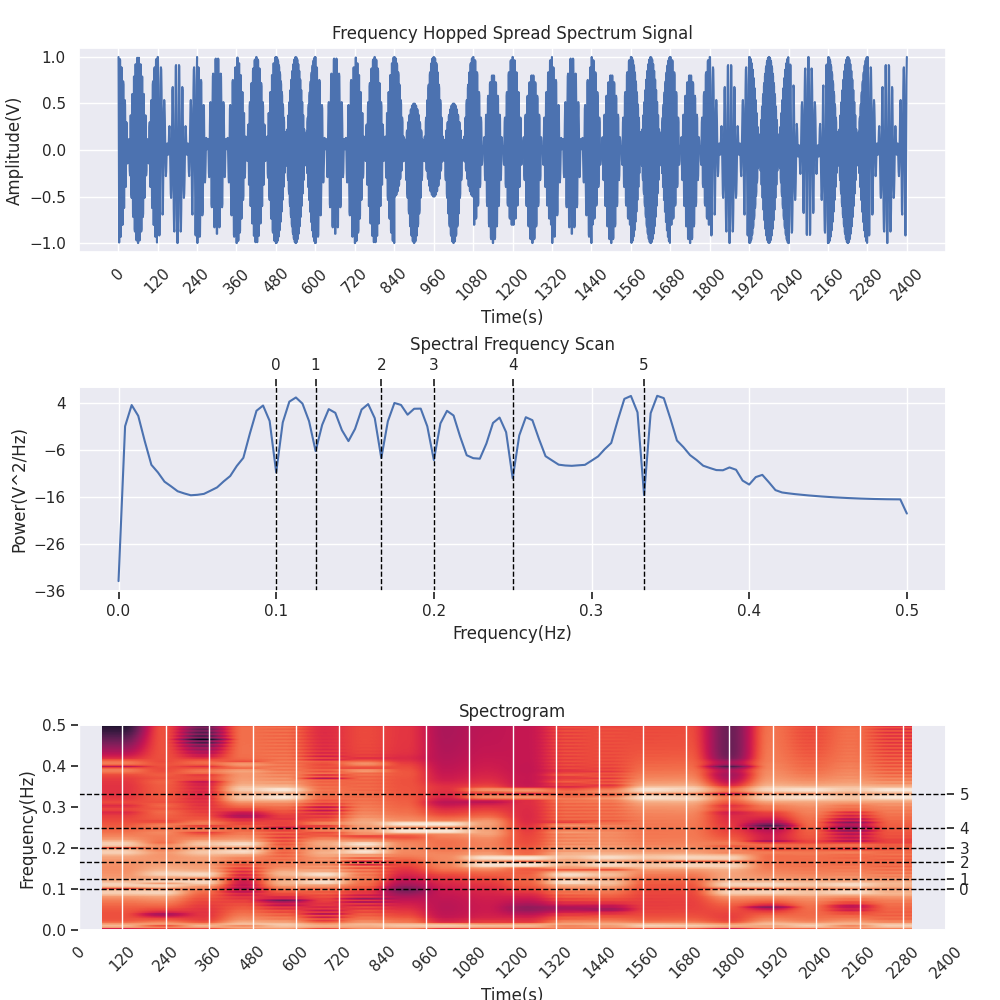

In [4]:
# Frequency hopping spread spectrum channel detection

import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.linalg as linalg

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.tight_layout(pad=2.5, h_pad=6, w_pad=6)

ax[0].plot(np.arange(1, N * T + 1), freq_hopped_sig)
ax[0].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[0].set_title('Frequency Hopped Spread Spectrum Signal')
ax[0].set_ylabel('Amplitude(V)')
ax[0].set_xlabel('Time(s)')

# Spectral frequency scan
ax[1].psd(freq_hopped_sig, NFFT=240, Fs=1)
ax[1].set_title('Spectral Frequency Scan')
ax[1].set_ylabel('Power(V^2/Hz)')
ax[1].set_xlabel('Frequency(Hz)')
ax1_chan = ax[1].twiny()
ax1_chan.set_xlim(ax[1].get_xlim())
ax1_chan.set_xticks([freq for chan, freq in freqs], [chan for chan, freq in freqs])
ax1_chan.grid(visible=True, axis='x', linestyle='--', color='black') # grid for channel

# Plot spectrogram
ax[2].specgram(freq_hopped_sig, NFFT=240, Fs=1)
# Set xticks by 180 intervals
ax[2].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[2].set_title('Spectrogram')
ax[2].set_ylabel('Frequency(Hz)')
ax[2].set_xlabel('Time(s)')
ax[2].grid(visible=False, axis='y')
ax2_chan = ax[2].twinx()
ax2_chan.set_ylim(ax[2].get_ylim())
ax2_chan.set_yticks([freq for chan, freq in freqs], [chan for chan, freq in freqs])
ax2_chan.grid(axis='y', linestyle='--', color='black') # grid for channel

print('Spreading Code :')
print(spread)

Number of samples analyzed: 8


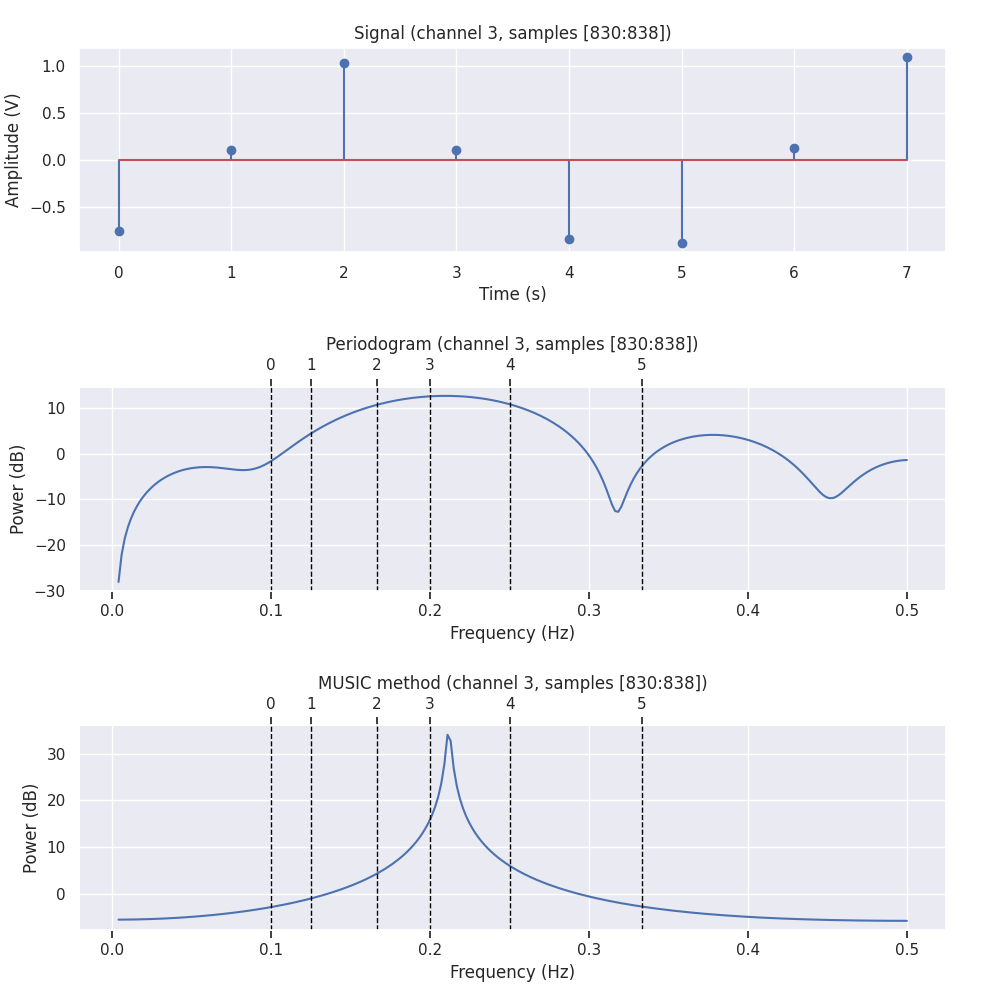

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

N = 8 # Number of samples to analyze in window
print(f"Number of samples analyzed: {N:d}")
fs = 1 # Sampling frequency
NF = 512 # lenght of the fourier transform
p = 1 # Number of sinusoids to detect in signal
pp = 2*p # Number of transmitance coefficients
m = np.arange(1, NF/2+1) # Frequency indices
f = fs*m/NF # Frequency axis
dt = 1/fs # Time step
t = np.arange(0, N)*dt # Time axis

amp = 0.01  # Amplitude of noise

n = 830 # start sample number
K = np.floor(n/T).astype(int)  # symbol number counted from 0
chan = len(factors) - spread[K] - 1

# Signal
np.random.seed(1)  # random generator initialization
x = freq_hopped_sig[n:n+N] + amp*np.random.randn(N)  # signal
x = x-np.mean(x)  # zero mean

# Periodogram (square of the Fourier transform, rectangular window)
X1 = abs(fft(x, NF))**2
Px1 = 10*np.log10(X1)

# Autocorrelation matrix order
# M = pp    : AR method,
# M = pp+1  : Pisarenko, ESPRIT
# M > pp+1  : MUSIC
M = pp + 2

# Calculation of the autocorrelation matrix
r = np.zeros(M+1)
for k in range(0, M+1):
    # estimate of the autocorrelation, r(0), r(1), ..., r(M)
    r[k] = np.sum(x[0:N-k]*x[k:N])/(N-k)
R = np.zeros((M, M))
for k in range(0, M):
    # matrix of the autocorrelation
    R[k, 0:M] = np.concatenate((r[k:0:-1], r[0:M-k]))

# MUSIC method
D, V = np.linalg.eig(R)
indx = np.argsort(D)  # sort eigenvalues
X2 = np.zeros(NF)
for k in range(0, pp):
    a = V[:, indx[k]]
    X2 = X2 + abs(fft(a, NF))**2
Px2 = -10*np.log10(X2)

# Plot results
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
fig.tight_layout(pad=2.5, h_pad=6, w_pad=6)

# # Signal plot
ax[0].stem(t, x)
# ax[0].set_xticks(np.arange(0, (N+1) * T, T), np.arange(0, (N+1) * T, T), rotation=45)
ax[0].set_title(f"Signal (channel {chan:n}, samples [{n}:{n+N}])")
ax[0].set_ylabel('Amplitude (V)')
ax[0].set_xlabel('Time (s)')

# Periodogram
ax[1].plot(f[1:m.size], Px1[1:m.size])
ax[1].set_title(f"Periodogram (channel {chan:n}, samples [{n}:{n+N}])")
ax[1].set_ylabel('Power (dB)')
ax[1].set_xlabel('Frequency (Hz)')
ax1_chan = ax[1].twiny()
ax1_chan.set_xlim(ax[1].get_xlim())
ax1_chan.set_xticks([freq for chan, freq in freqs], [chan for chan, freq in freqs])
ax1_chan.grid(visible=True, axis='x', linestyle='--', color='black') # grid for channel

# Plot MUSIC result
ax[2].plot(f[1:m.size], Px2[1:m.size])
ax[2].set_title(f"MUSIC method (channel {chan:n}, samples [{n}:{n+N}])")
ax[2].set_ylabel('Power (dB)')
ax[2].set_xlabel('Frequency (Hz)')
ax2_chan = ax[2].twiny()
ax2_chan.set_xlim(ax[2].get_xlim())
ax2_chan.set_xticks([freq for chan, freq in freqs], [chan for chan, freq in freqs])
ax2_chan.grid(visible=True, axis='x', linestyle='--', color='black') # grid for channel

### Interactive MUSIC plot

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Number of samples analyzed: 8


interactive(children=(IntSlider(value=100, continuous_update=False, description='n', layout=Layout(width='70%'…

<function __main__.move_window(n)>

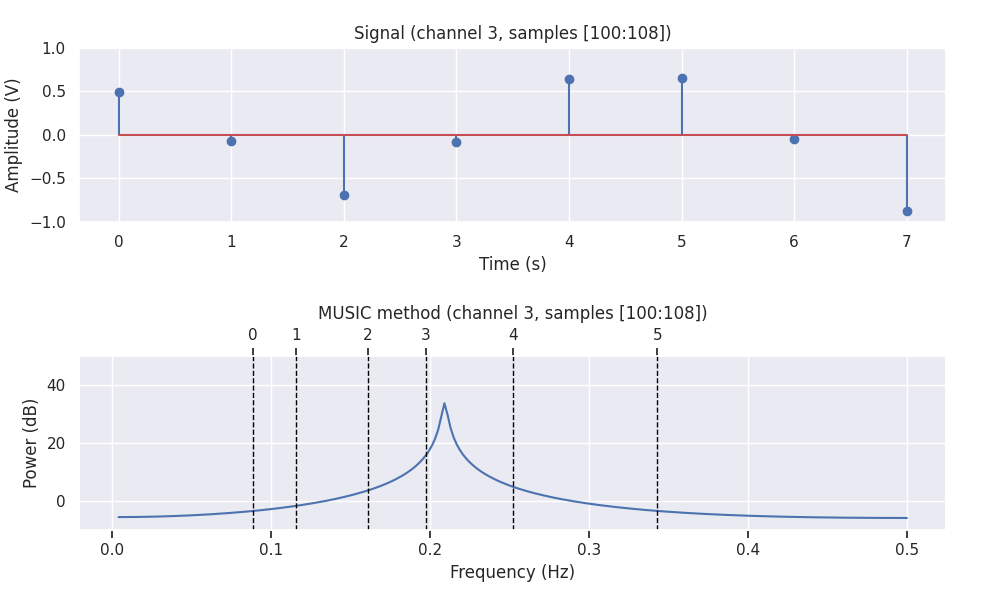

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

N = 8 # Number of samples to analyze in window
print(f"Number of samples analyzed: {N:d}")
fs = 1 # Sampling frequency
NF = 512 # lenght of the fourier transform
p = 1 # Number of sinusoids to detect in signal
pp = 2*p # Number of transmitance coefficients
# Autocorrelation matrix order
# M = pp    : AR method,
# M = pp+1  : Pisarenko, ESPRIT
# M > pp+1  : MUSIC
M = pp + 2
m = np.arange(1, NF/2+1) # Frequency indices
f = fs*m/NF # Frequency axis
dt = 1/fs # Time step
t = np.arange(0, N)*dt # Time axis

amp = 0.01  # Amplitude of noise

# Signal
np.random.seed(1)  # random generator initialization

# Plot results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.tight_layout(pad=2.5, h_pad=6, w_pad=6)

ax[1].set_xlim(0, 0.5)
ax2_chan = ax[1].twiny()
ax2_chan.set_xlim(ax[1].get_xlim())
ax2_chan.set_xticks([freq for chan, freq in freqs], [chan for chan, freq in freqs])
ax2_chan.grid(visible=True, axis='x', linestyle='--', color='black') # grid for channel

def move_window(n):
    # n = 830 # start sample number
    K = np.floor(n/T).astype(int)  # symbol number counted from 0
    chan = len(factors) - spread[K] - 1

    x = freq_hopped_sig[n:n+N] + amp*np.random.randn(N)  # signal
    x = x-np.mean(x)  # zero mean

    # Calculation of the autocorrelation matrix
    r = np.zeros(M+1)
    for k in range(0, M+1):
        # estimate of the autocorrelation, r(0), r(1), ..., r(M)
        r[k] = np.sum(x[0:N-k]*x[k:N])/(N-k)
    R = np.zeros((M, M))
    for k in range(0, M):
        # matrix of the autocorrelation
        R[k, 0:M] = np.concatenate((r[k:0:-1], r[0:M-k]))

    # MUSIC method
    D, V = np.linalg.eig(R)
    indx = np.argsort(D)  # sort eigenvalues
    X2 = np.zeros(NF)
    for k in range(0, pp):
        a = V[:, indx[k]]
        X2 = X2 + abs(fft(a, NF))**2
    Px2 = -10*np.log10(X2)

    # Signal plot
    # Update plot in place
    ax[0].clear()
    ax[0].stem(t, x)
    ax[0].set_title(f"Signal (channel {chan:n}, samples [{n}:{n+N}])")
    ax[0].set_ylim(-1,1)
    ax[0].set_ylabel('Amplitude (V)')
    ax[0].set_xlabel('Time (s)')

    # Plot MUSIC result
    ax[1].clear()
    ax[1].plot(f[1:m.size], Px2[1:m.size])
    ax[1].set_title(f"MUSIC method (channel {chan:n}, samples [{n}:{n+N}])")
    ax[1].set_ylim(-10,50)
    ax[1].set_ylabel('Power (dB)')
    ax[1].set_xlabel('Frequency (Hz)')
    
    fig.canvas.draw_idle()


interact(move_window, n=widgets.IntSlider(min=0, max=2400-N, step=1, value=100, continuous_update=False,layout=widgets.Layout(width='70%')))